# Predicting mental health treatment need using machine learning
A classification model that predicts whether a person is likely to seek or need mental health treatment, based on survey responses. The insights can help organizations or clinics identify high-risk groups and encourage early intervention. 

This project will be a full data pipeline (cleaning → EDA → feature engineering → modeling → evaluation).

## 1. Problem definition

Statement
> Given information about an employee's demographics, workplace conditions, and personal mental health history, can we predict whether they are likely to seek treatment?

## 2. Data

The data is a structured (CSV) and static data from Kaggle - https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

## 3. Success Criteria

> A model with ≥ 85% accuracy and ≥ 80% recall for the positive class (that is, people who seek treatment) will be considered successful.

## 4. Features
This shows different information about each of the features in the data. The ones with ✅ will be used

1. Timestamp
2. Age ✅
3. Gender ✅
4. Country
5. state: If you live in the United States, which state or territory do you live in?
6. self_employed: Are you self-employed? 
7. family_history: Do you have a family history of mental illness? ✅
8. treatment: Have you sought treatment for a mental health condition? (This will be our target variable) ✅
9. work_interfere: If you have a mental health condition, do you feel that it interferes with your work? ✅
10. no_employees: How many employees does your company or organization have? ✅
11. remote_work: Do you work remotely (outside of an office) at least 50% of the time? ✅
12. tech_company: Is your employer primarily a tech company/organization?
13. benefits: Does your employer provide mental health benefits? ✅
14. care_options: Do you know the options for mental health care your employer provides? ✅
15. wellness_program: Has your employer ever discussed mental health as part of an employee wellness program? ✅
16. seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help? ✅
17. anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources? ✅
18. leave: How easy is it for you to take medical leave for a mental health condition? ✅
19. mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?
20. phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?
21. coworkers: Would you be willing to discuss a mental health issue with your coworkers?
22. supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?
23. mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?
24. phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?
25. mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health? ✅
26. obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace? ✅
27. comments: Any additional notes or comments

### Preparing the tools

I will be using pandas, Matplotlib and NumPy for data analysis and manipulation, and SKLearn for the model

In [1]:
# Import all the tools I need

# Regular EDA (Exploratory Data Analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve, accuracy_score

### 4.0. Load and explore the data

**Load the data**

In [2]:
df = pd.read_csv("data/mental-health-in-tech-survey.csv")

**Preview and inspect**

In [3]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [5]:
df.shape

(1259, 27)

In [6]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [7]:
df.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


### 4.1 Data Cleaning

In [8]:
# Make a copy
df_tmp = df.copy()
df_tmp.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [9]:
# Drop irrelevant/redundant columns - Timestamp, comments and state
df_tmp.drop(columns=["Timestamp", "state", "comments"], inplace=True)

In [10]:
# Drop columns we won't use during deployment
df_tmp.drop(columns=["Country", "self_employed", "tech_company", "mental_health_consequence", "phys_health_consequence", "coworkers", "supervisor", "mental_health_interview", "phys_health_interview"], inplace=True)

In [11]:
# Standardize column names
df_tmp.columns = df_tmp.columns.str.lower().str.replace(" ", "_")

In [12]:
df_tmp.isnull().sum()

age                     0
gender                  0
family_history          0
treatment               0
work_interfere        264
no_employees            0
remote_work             0
benefits                0
care_options            0
wellness_program        0
seek_help               0
anonymity               0
leave                   0
mental_vs_physical      0
obs_consequence         0
dtype: int64

In [13]:
# Impute work_interfere with 'Not specified'
df_tmp["work_interfere"] = df_tmp["work_interfere"].fillna("Not specified")

In [14]:
# Clean the Age column - remove outliers
df_tmp = df_tmp[(df_tmp["age"] > 17) & (df_tmp["age"] < 75)]

In [15]:
# Normalize gender values
def clean_gender(g):
    g = str(g).strip().lower()
    if g in ["male", "m", "man", "male-ish", "maile", "malr", "mal", "msle", "cis male", "cis man", "make", "mail", "guy (-ish) ^_^", "male (cis)", "ostensibly male, unsure what that really means", "something kinda male?"]:
        return "Male"
    elif g in ["female", "f", "woman", "cis female", "cis-female/femme", "female (cis)", "femake", "femail", "trans-female", "female (trans)", "trans woman"]:
        return "Female"
    else:
        return "Other"

df_tmp.loc[:, "gender"] = df_tmp["gender"].apply(clean_gender)

### 4.2. Exploratory Data Analysis (EDA)

In [16]:
# Count each set of the target variable
df_tmp["treatment"].value_counts()

treatment
Yes    632
No     619
Name: count, dtype: int64

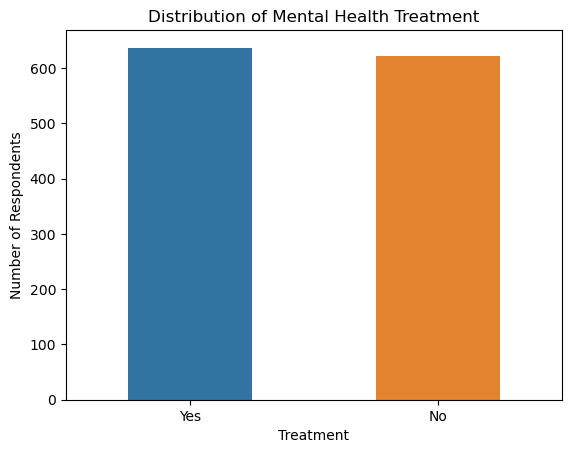

In [17]:
# Distribution of the target
df["treatment"].value_counts().plot(kind="bar", color=["#3274a1", "#e48128fa"])
plt.title("Distribution of Mental Health Treatment")
plt.xlabel("Treatment")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=0)
plt.show()

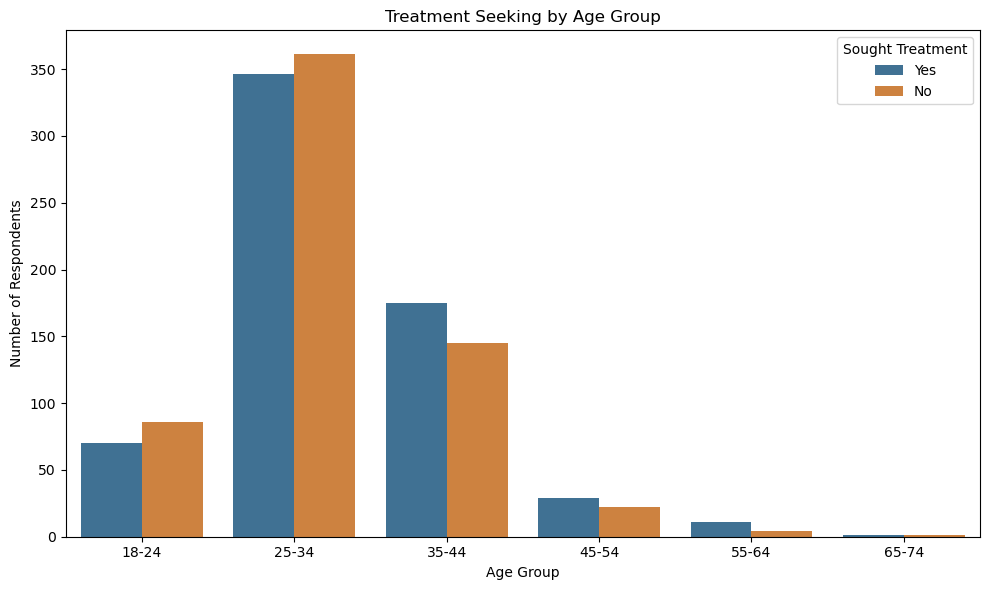

In [18]:
# Create Age groups
bins = [17, 24, 34, 44, 54, 64, 74]
labels = ["18-24", "25-34", "35-44", "45-54", "55-64", "65-74"]
df_tmp["age_group"] = pd.cut(df_tmp["age"], bins=bins, labels=labels)

# Custom palette
custom_palette = {
    "Yes": "#3274a1",
    "No": "#e48128fa"
}

# Plot Age vs. treatment
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x="age_group", hue="treatment", palette=custom_palette)
plt.title("Treatment Seeking by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(title="Sought Treatment")
plt.tight_layout()
plt.show()

In [19]:
df_tmp.gender.value_counts()

gender
Male      989
Female    251
Other      11
Name: count, dtype: int64

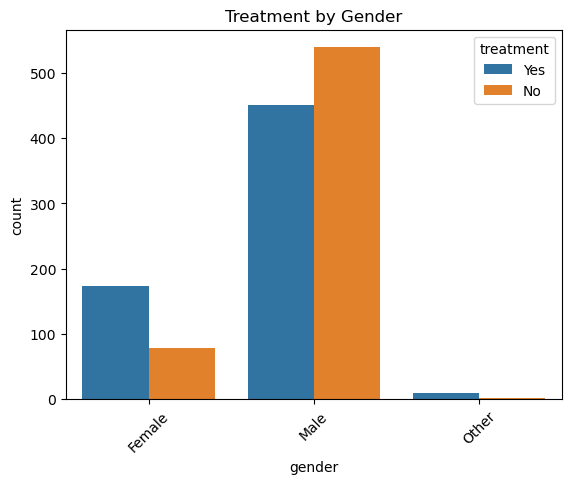

In [20]:
sns.countplot(data=df_tmp, x='gender', hue='treatment')
plt.title('Treatment by Gender')
plt.xticks(rotation=45)
plt.show()

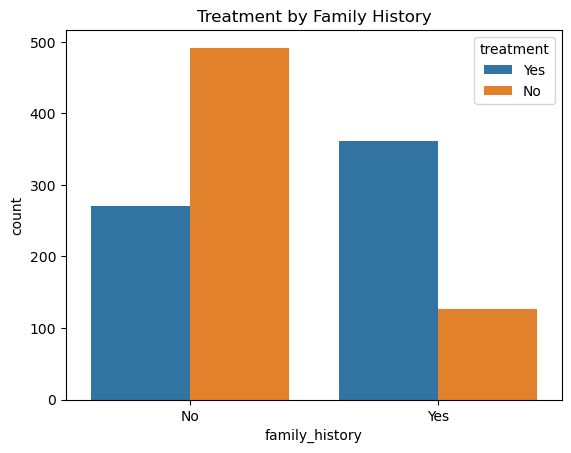

In [21]:
sns.countplot(data=df_tmp, x='family_history', hue='treatment')
plt.title('Treatment by Family History')
plt.show()

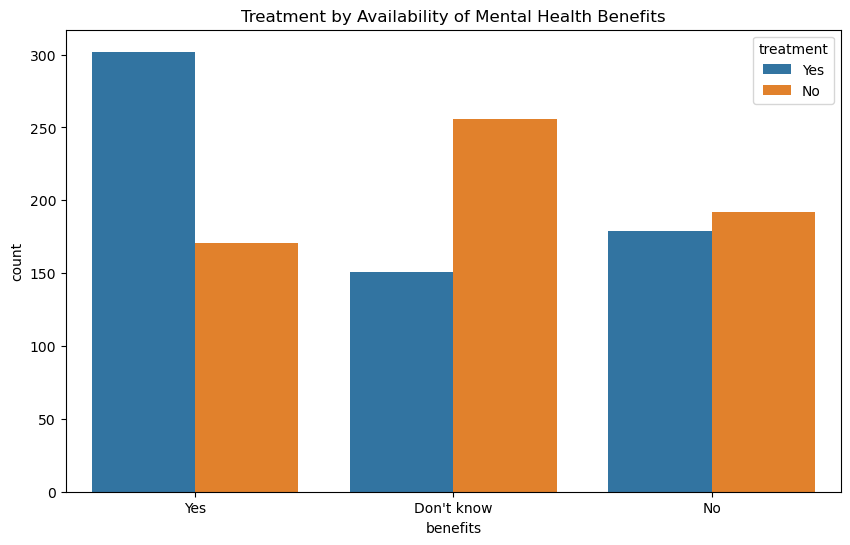

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x='benefits', hue='treatment')
plt.title('Treatment by Availability of Mental Health Benefits')
plt.show()

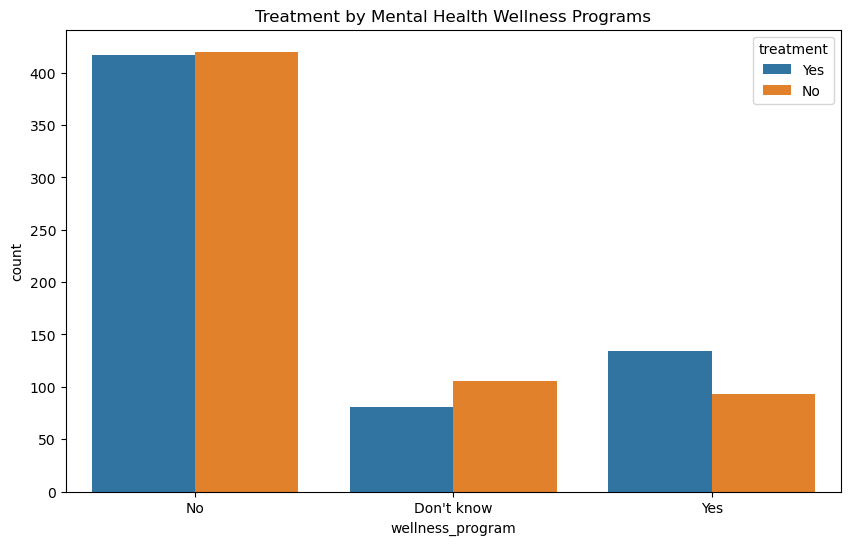

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_tmp, x='wellness_program', hue='treatment')
plt.title('Treatment by Mental Health Wellness Programs')
plt.show()

### 4.3. Feature Encoding

In [24]:
for col in df_tmp.columns:
    print(f"{col}: {df_tmp[col].unique()}\n")

age: [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]

gender: ['Female' 'Male' 'Other']

family_history: ['No' 'Yes']

treatment: ['Yes' 'No']

work_interfere: ['Often' 'Rarely' 'Never' 'Sometimes' 'Not specified']

no_employees: ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work: ['No' 'Yes']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know" 'No']

anonymity: ['Yes' "Don't know" 'No']

leave: ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

mental_vs_physical: ['Yes' "Don't know" 'No']

obs_consequence: ['No' 'Yes']

age_group: ['35-44', '25-34', '18-24', '45-54', '55-64', '65-74']
Categories (6, object): ['18-24' < '25-34' < '35-44' < '45-54' < '55-64' < '65-74']



In [25]:
# Map Yes/No or similar to 1/0 - Binary Encoding
binary_cols = [col for col in df_tmp.columns if df_tmp[col].nunique() == 2]
binary_cols

['family_history', 'treatment', 'remote_work', 'obs_consequence']

In [26]:
for col in binary_cols:
    df_tmp[col] = df_tmp[col].map({"Yes": 1, "No": 0})

In [27]:
# Ordered categories - Ordinal Encoding
work_interfere_map = {
    "Never": 0, "Rarely": 1, "Sometimes": 2, "Often": 3, "Not specified": -1
}
df_tmp["work_interfere"] = df_tmp["work_interfere"].map(work_interfere_map)

no_employees_map = {
    "1-5": 0, "6-25": 1, "26-100": 2, "100-500": 3, "500-1000": 4, "More than 1000": 5
}
df_tmp["no_employees"] = df_tmp["no_employees"].map(no_employees_map)

leave_map = {
    "Very easy": 0, "Somewhat easy": 1, "Don't know": 2,
    "Somewhat difficult": 3, "Very difficult": 4
}
df_tmp["leave"] = df_tmp["leave"].map(leave_map)

In [28]:
for col in df_tmp.select_dtypes(include="object").columns:
    print(f"{col}: {df_tmp[col].unique()}\n")

gender: ['Female' 'Male' 'Other']

benefits: ['Yes' "Don't know" 'No']

care_options: ['Not sure' 'No' 'Yes']

wellness_program: ['No' "Don't know" 'Yes']

seek_help: ['Yes' "Don't know" 'No']

anonymity: ['Yes' "Don't know" 'No']

mental_vs_physical: ['Yes' "Don't know" 'No']



In [29]:
# For Small nominal categories - one-hot encoding
one_hot_cols = [
    "gender",
    "benefits",
    "care_options",
    "wellness_program",
    "seek_help",
    "anonymity",
    "mental_vs_physical"
]
df_tmp = pd.get_dummies(df_tmp, columns=one_hot_cols, drop_first=True)

In [30]:
# Drop age_group and use age
df_tmp.drop(columns=["age_group"], inplace=True)

## 5. Modelling

We will train a `RandomForestClassifier` with hand-tuned parameters which is the best we got from our main notebooks

### 5.1. Random Forest Classifier

In [31]:
df_tmp.head(1).T

,0
age,37
family_history,0
treatment,1
work_interfere,3
no_employees,1
remote_work,0
leave,1
obs_consequence,0
gender_Male,False
gender_Other,False


In [32]:
np.random.seed(42)

# Split data into X and y
X = df_tmp.drop(["treatment"], axis=1)
y = df_tmp["treatment"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model
model = RandomForestClassifier(
    n_estimators=150,
    max_depth=10,
    min_samples_split=2,
    max_features="sqrt",
    class_weight="balanced" ,
    random_state=42
)

# Fit the model to the training datasets
model.fit(X_train, y_train)

# Test the model
y_preds = model.predict(X_test)

print("RandomForestClassifier Accuracy Score: ", accuracy_score(y_test, y_preds))
print("RandomForestClassifier Recall Score: ", recall_score(y_test, y_preds))

RandomForestClassifier Accuracy Score:  0.848404255319149
RandomForestClassifier Recall Score:  0.92


In [33]:
X_train.head(0).T

""
age
family_history
work_interfere
no_employees
remote_work
leave
obs_consequence
gender_Male
gender_Other
benefits_No


## 6. Model Evaluation

In [34]:
# Evaluation code template
from IPython.display import display, Markdown

def evaluate_model(model, X_test, y_test, model_name="RandomForestClassifier"):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    display(Markdown(f"### 📌 **{model_name}**"))
    print("\nAccuracy:", acc)
    print("\n\n")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    print("\n\n")
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # ROC Curve
    print("\n\n")
    if len(set(y_test)) == 2:
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        print("ROC AUC Score:", auc_score)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        plt.plot([0, 1], [0, 1], linestyle="--")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"{model_name} - ROC Curve")
        plt.legend()
        plt.show()

### 📌 **RandomForestClassifier**


Accuracy: 0.848404255319149



Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       176
           1       0.82      0.92      0.87       200

    accuracy                           0.85       376
   macro avg       0.86      0.84      0.85       376
weighted avg       0.85      0.85      0.85       376






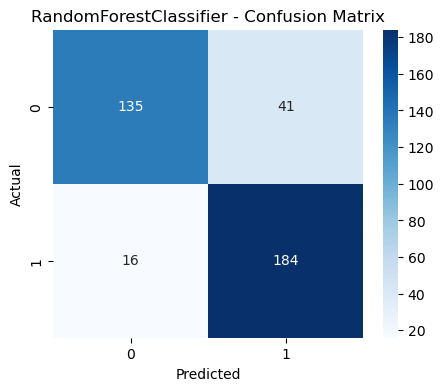




ROC AUC Score: 0.8885227272727273


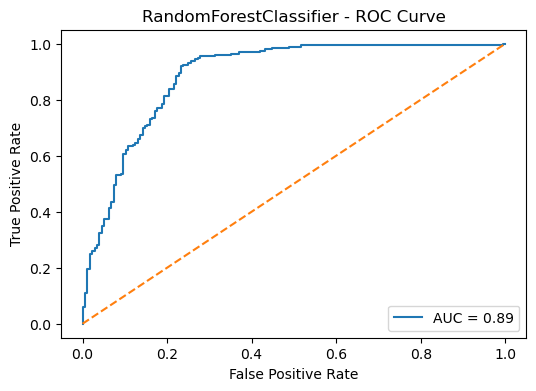

In [35]:
evaluate_model(model, X_test, y_test)

## Export model

In [36]:
import joblib

joblib.dump(model, "data/mental_health_model_deployment.pkl")

['data/mental_health_model_deployment.pkl']

In [37]:
pip install skl2onnx

Note: you may need to restart the kernel to use updated packages.


In [38]:
X_train.shape[1]

21

In [39]:
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Number of features
n_features = X_train.shape[1]

initial_type = [("float_input", FloatTensorType([None, n_features]))]

onnx_model = convert_sklearn(
    model,
    initial_types=initial_type,
    options={id(model): {"zipmap": False}}
)

with open("data/mental_health_model_deployment.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

print("Exported mental_health_model_deployment.onnx")

Exported mental_health_model_deployment.onnx
